# Libraries

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

# plot style
plt.style.use("seaborn-v0_8")
# print(plt.style.available)

# the "R4" palette
_colours = ["#000000f0", "#DF536Bf0", "#61D04Ff0", "#2297E6f0",
            "#28E2E5f0", "#CD0BBCf0", "#F5C710f0", "#999999f0"]

_linestyles = ["solid", "dashed", "dashdot", "dotted"]

# A different plotting style for each plotted line
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=_colours, linestyle=_linestyles*2)
plt.rcParams["patch.facecolor"] = _colours[0]

# Python version
import sys
print(f"sys: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborns {sns.__version__}")

sys: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
numpy: 1.24.2
scipy: 1.10.1
pandas: 1.5.3
matplotlib: 3.7.1
seaborns 0.12.2


# Load data

In [2]:
body = pd.read_csv("data/nhanes_adult_female_bmx_2020.csv", comment="#")
body = np.array(body)

# Vectorized functions

In [3]:
A = np.array([
    [0.2, 0.6, 0.4, 0.4],
    [0.0, 0.2, 0.4, 0.7],
    [0.8, 0.8, 0.2, 0.1]
])

print(A)

[[0.2 0.6 0.4 0.4]
 [0.  0.2 0.4 0.7]
 [0.8 0.8 0.2 0.1]]


In [4]:
print(np.square(A))

[[0.04 0.36 0.16 0.16]
 [0.   0.04 0.16 0.49]
 [0.64 0.64 0.04 0.01]]


In [5]:
# mean of all data
print(np.mean(A))

0.39999999999999997


In [6]:
# mean for each column
np.mean(A, axis=0)

array([0.33333333, 0.53333333, 0.33333333, 0.4       ])

In [7]:
# mean for each row
np.mean(A, axis=1)

array([0.4  , 0.325, 0.475])

# Indexing Matrices

In [8]:
A = np.array([
    [1, 2, 3, 4, 500],
    [10, 20, 30, 40, 50],
    [100, 200, 300, 400, 5]
])

print(A)

[[  1   2   3   4 500]
 [ 10  20  30  40  50]
 [100 200 300 400   5]]


In [9]:
# Indexing based on two slices (results = a matrix)
A[::2, 3:]

array([[  4, 500],
       [400,   5]])

In [10]:
# Reversed columns (results = a matrix)
A[:, ::-1]

array([[500,   4,   3,   2,   1],
       [ 50,  40,  30,  20,  10],
       [  5, 400, 300, 200, 100]])

In [11]:
# Reversed rows (results = a matrix)
A[::-1, :]

array([[100, 200, 300, 400,   5],
       [ 10,  20,  30,  40,  50],
       [  1,   2,   3,   4, 500]])

In [12]:
# Indexing based on a scalar (results = a vector)
A[:, 3]

array([  4,  40, 400])

In [13]:
# Indexing based on a scalar (results = a scalar)
A[0, 3]

4

In [14]:
# Indexing based on mixed integer and slice (results = a matrix)
A[[0, -1, 0], ::-1]

array([[500,   4,   3,   2,   1],
       [  5, 400, 300, 200, 100],
       [500,   4,   3,   2,   1]])

In [15]:
# Indexing based on mixed boolen and slice (results = a matrix)
A[ A[:, 0] > 5, 1:3]

array([[ 20,  30],
       [200, 300]])

In [16]:
# Indexing based on mixed boolen and slice (results = a matrix)
A[ np.mean(A, axis=1) > 10, :]

array([[  1,   2,   3,   4, 500],
       [ 10,  20,  30,  40,  50],
       [100, 200, 300, 400,   5]])

In [17]:
# Indexing based on mixed boolen and slice (results = a matrix)
A[ np.argsort(A[:, -1]), :] # order the matrix with respect to the values in the last column

array([[100, 200, 300, 400,   5],
       [ 10,  20,  30,  40,  50],
       [  1,   2,   3,   4, 500]])

mean       = 160.13679222932953
SD         = 7.062021850008261
mean - 2SD = 146.012748529313
mean + 2SD = 174.26083592934606
body shape:   (4221, 7)
body_2 shape: (4027, 7)


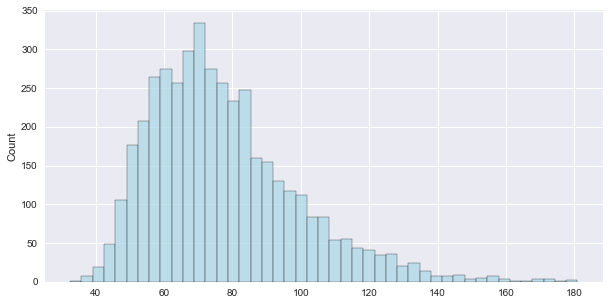

In [18]:
# Select all the participants whose heights (second column) are within their mean ± 2 standard deviations.
lim1 = body[:,1] > (np.mean(body[:,1]) - 2*np.std(body[:,1]))
lim2 = body[:,1] < (np.mean(body[:,1]) + 2*np.std(body[:,1]))
body_2 = body[ lim1 & lim2, : ]

print(f"mean       = { np.mean(body[:,1])}")
print(f"SD         = { np.std(body[:,1]) }")
print(f"mean - 2SD = { (np.mean(body[:,1]) - 2*np.std(body[:,1])) }")
print(f"mean + 2SD = { (np.mean(body[:,1]) + 2*np.std(body[:,1])) }")

print(f"body shape:   {body.shape}")
print(f"body_2 shape: {body_2.shape}")

plt.figure(figsize=(10,5))
sns.histplot(body[:,0], color="lightblue")
plt.show()

# Modifying Rows and Columns

In [19]:
A = np.array([
    [1, 2, 3, 4, 500],
    [10, 20, 30, 40, 50],
    [100, 200, 300, 400, 5]
])

print(A)

[[  1   2   3   4 500]
 [ 10  20  30  40  50]
 [100 200 300 400   5]]


In [20]:
A[:, 0] = A[:, 0] * -1
print(A)

[[  -1    2    3    4  500]
 [ -10   20   30   40   50]
 [-100  200  300  400    5]]


# Adding Rows and Columns

In [21]:
A = np.array([
    [1, 2, 3, 4, 500],
    [10, 20, 30, 40, 50],
    [100, 200, 300, 400, 5]
])

print(A)

[[  1   2   3   4 500]
 [ 10  20  30  40  50]
 [100 200 300 400   5]]


In [22]:
A = np.row_stack((A, np.sqrt(A[-1, :])))
print(A)

[[  1.           2.           3.           4.         500.        ]
 [ 10.          20.          30.          40.          50.        ]
 [100.         200.         300.         400.           5.        ]
 [ 10.          14.14213562  17.32050808  20.           2.23606798]]
